In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
gdp = pd.read_csv("Europe_GDP.csv")
gdp.head()

,Year,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
0,1960,6.650134e+09,1.181062e+10,6.361166e+09,5.279011e+09,6.222548e+10,8.431095e+10,4.335192e+09,252169712.0,1.998550e+09,4.191581e+10,709941874.0,1.326346e+10,5.197399e+09,3.339150e+09,1.243339e+10,1.595320e+10,1.041223e+10,7.323397e+10
1,1961,7.375455e+09,1.256170e+10,7.058361e+09,5.983900e+09,6.746164e+10,9.620573e+10,4.961399e+09,257703244.6,2.151773e+09,4.654222e+10,710163719.4,1.457838e+10,5.669689e+09,3.573719e+09,1.424830e+10,1.735478e+10,1.171335e+10,7.774197e+10
2,1962,7.823687e+09,1.343683e+10,7.953274e+09,6.407225e+09,7.560753e+10,1.055090e+11,5.213043e+09,289200704.4,2.329373e+09,5.229335e+10,747846862.2,1.582429e+10,6.107077e+09,3.835884e+09,1.662150e+10,1.882135e+10,1.298965e+10,8.124756e+10
3,1963,8.447137e+09,1.444581e+10,8.466045e+09,6.958296e+09,8.475920e+10,1.118230e+11,5.895281e+09,345175036.1,2.505073e+09,5.989787e+10,797902154.2,1.716848e+10,6.553270e+09,4.084252e+09,1.964575e+10,2.037167e+10,1.428387e+10,8.656196e+10
4,1964,9.249879e+09,1.616804e+10,9.677401e+09,7.848288e+09,9.400785e+10,1.228800e+11,6.669670e+09,440797869.3,2.851092e+09,6.556965e+10,910877686.3,2.020232e+10,7.206522e+09,4.429203e+09,2.198258e+10,2.271843e+10,1.583313e+10,9.440756e+10


In [3]:
# check the shape
gdp.shape

(64, 19)

In [4]:
gdp = gdp.set_index('Year')
gdp.head()

,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
Year,,,,,,,,,,,,,,,,,,
1960,6.650134e+09,1.181062e+10,6.361166e+09,5.279011e+09,6.222548e+10,8.431095e+10,4.335192e+09,252169712.0,1.998550e+09,4.191581e+10,709941874.0,1.326346e+10,5.197399e+09,3.339150e+09,1.243339e+10,1.595320e+10,1.041223e+10,7.323397e+10
1961,7.375455e+09,1.256170e+10,7.058361e+09,5.983900e+09,6.746164e+10,9.620573e+10,4.961399e+09,257703244.6,2.151773e+09,4.654222e+10,710163719.4,1.457838e+10,5.669689e+09,3.573719e+09,1.424830e+10,1.735478e+10,1.171335e+10,7.774197e+10
1962,7.823687e+09,1.343683e+10,7.953274e+09,6.407225e+09,7.560753e+10,1.055090e+11,5.213043e+09,289200704.4,2.329373e+09,5.229335e+10,747846862.2,1.582429e+10,6.107077e+09,3.835884e+09,1.662150e+10,1.882135e+10,1.298965e+10,8.124756e+10
1963,8.447137e+09,1.444581e+10,8.466045e+09,6.958296e+09,8.475920e+10,1.118230e+11,5.895281e+09,345175036.1,2.505073e+09,5.989787e+10,797902154.2,1.716848e+10,6.553270e+09,4.084252e+09,1.964575e+10,2.037167e+10,1.428387e+10,8.656196e+10
1964,9.249879e+09,1.616804e+10,9.677401e+09,7.848288e+09,9.400785e+10,1.228800e+11,6.669670e+09,440797869.3,2.851092e+09,6.556965e+10,910877686.3,2.020232e+10,7.206522e+09,4.429203e+09,2.198258e+10,2.271843e+10,1.583313e+10,9.440756e+10


In [10]:
# check info
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 1960 to 2023
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Austria         64 non-null     float64
 1   Belgium         64 non-null     float64
 2   Denmark         64 non-null     float64
 3   Finland         64 non-null     float64
 4   France          64 non-null     float64
 5   Germany         64 non-null     float64
 6   Greece          64 non-null     float64
 7   Iceland         64 non-null     float64
 8   Ireland         64 non-null     float64
 9   Italy           64 non-null     float64
 10  Luxembourg      64 non-null     float64
 11  Netherlands     64 non-null     float64
 12  Norway          64 non-null     float64
 13  Portugal        64 non-null     float64
 14  Spain           64 non-null     float64
 15  Sweden          64 non-null     float64
 16  Switzerland     64 non-null     float64
 17  United Kingdom  64 non-null     float

In [12]:
# check for null values
gdp.isna().sum()

Austria           0
Belgium           0
Denmark           0
Finland           0
France            0
Germany           0
Greece            0
Iceland           0
Ireland           0
Italy             0
Luxembourg        0
Netherlands       0
Norway            0
Portugal          0
Spain             0
Sweden            0
Switzerland       0
United Kingdom    0
dtype: int64

In [13]:
# list of columns
gdp.columns.to_list()

['Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

In [18]:
gdp['Austria'].value_counts().sort_values(ascending=False)

Austria
6.650134e+09    1
7.375455e+09    1
7.823687e+09    1
8.447137e+09    1
9.249879e+09    1
               ..
4.445960e+11    1
4.350490e+11    1
4.792950e+11    1
4.709420e+11    1
5.160340e+11    1
Name: count, Length: 64, dtype: int64

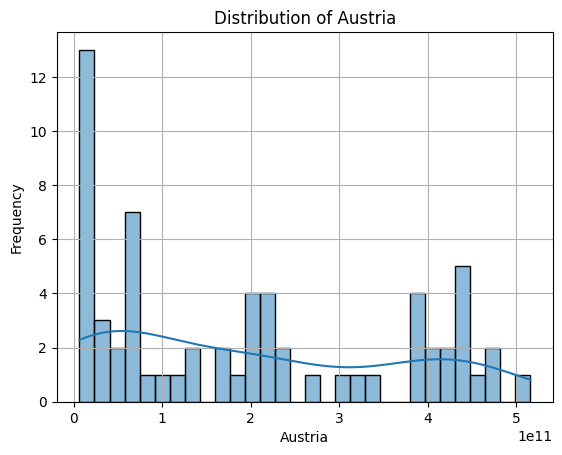

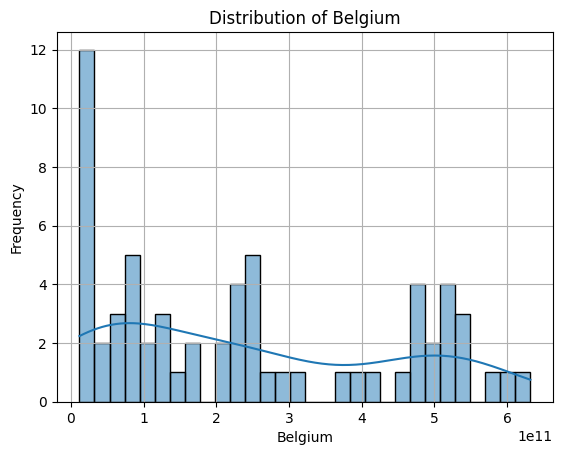

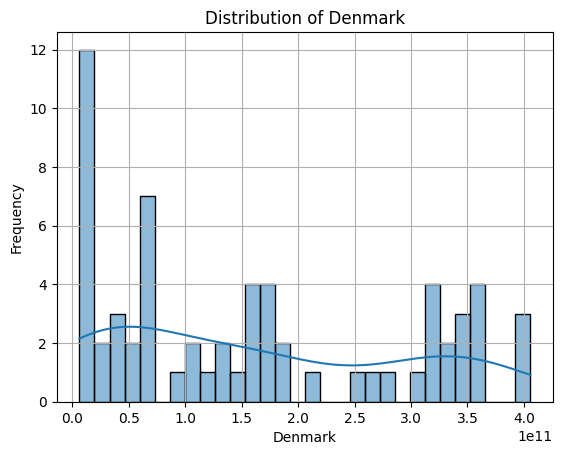

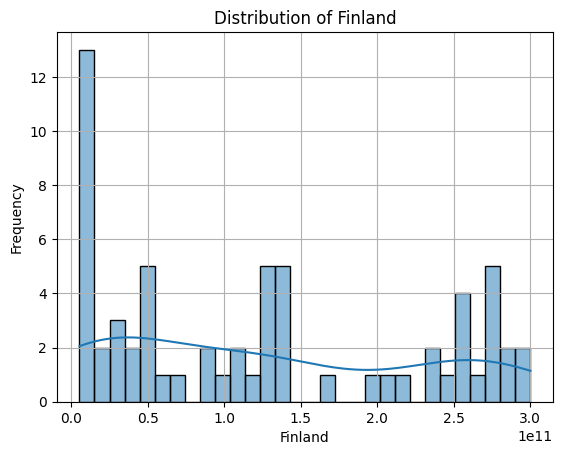

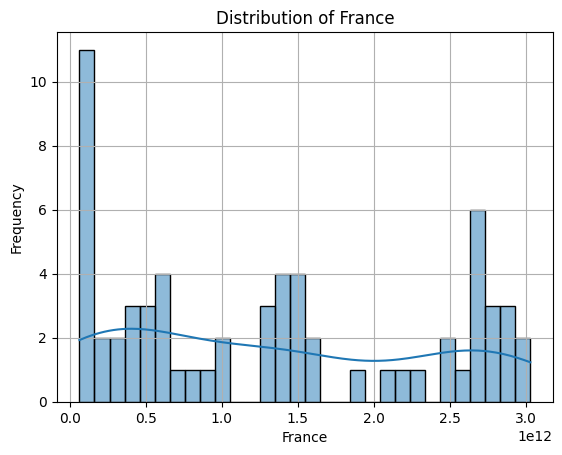

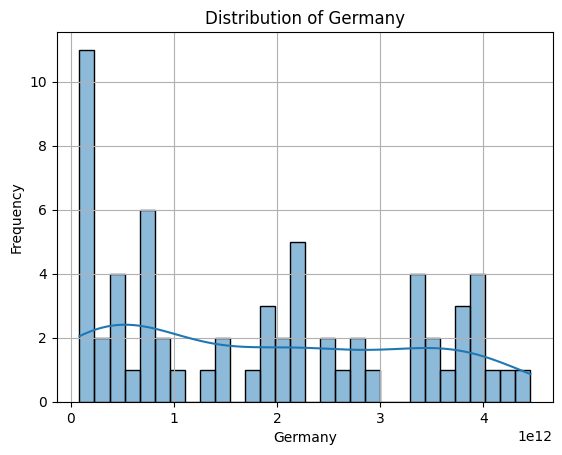

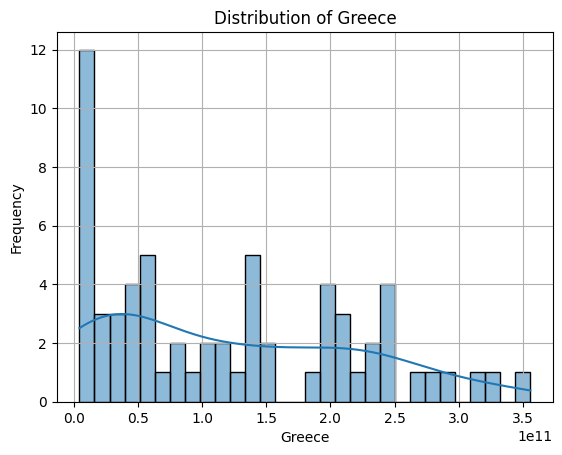

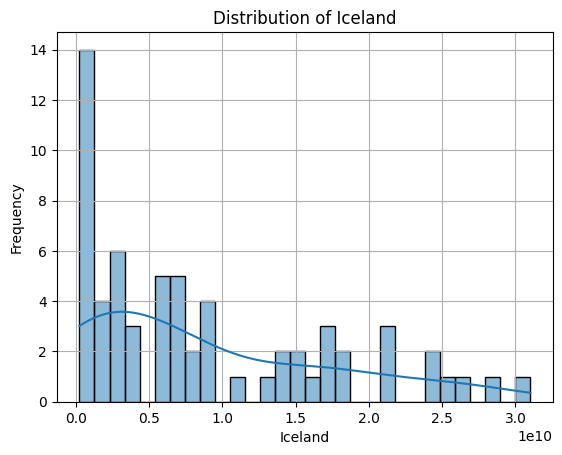

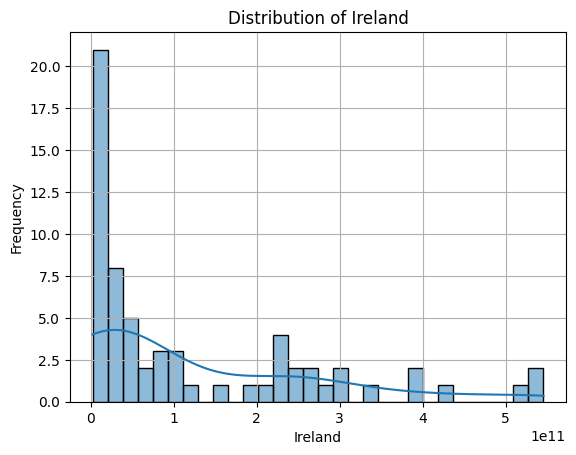

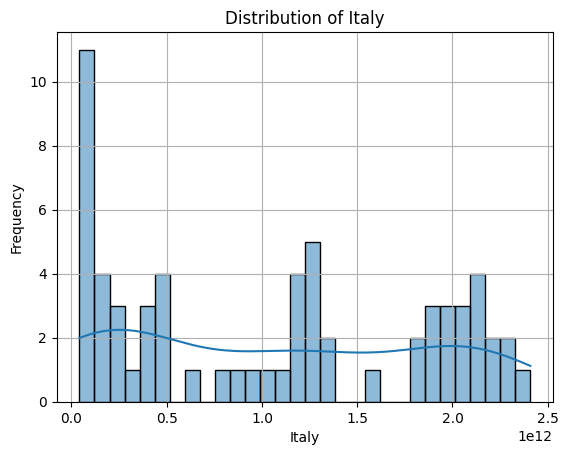

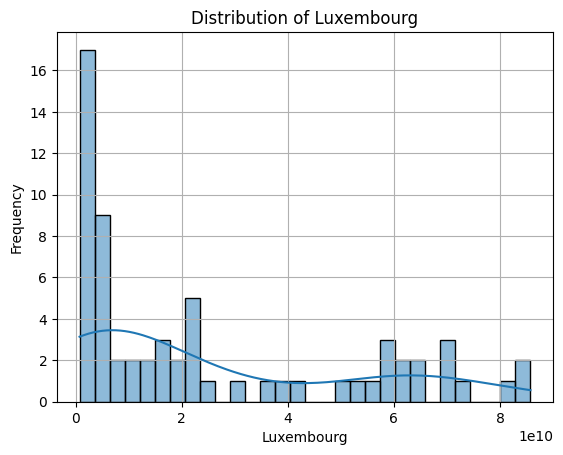

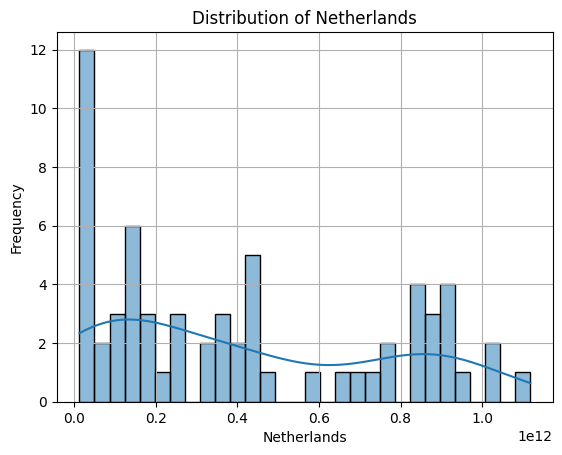

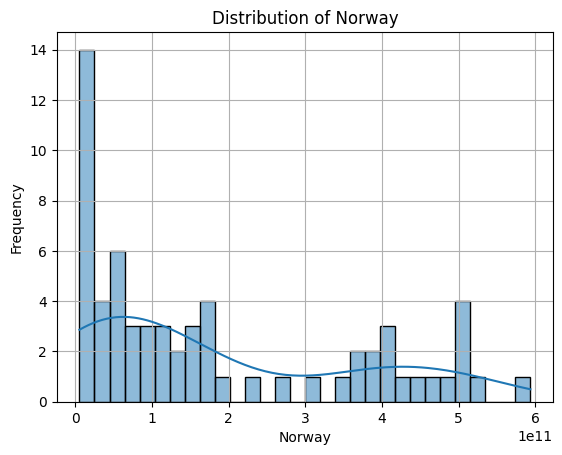

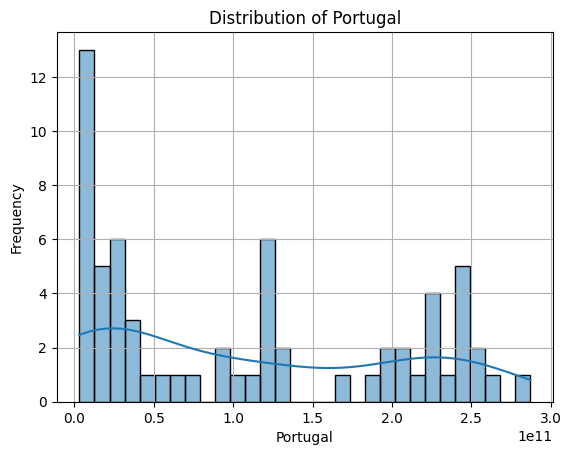

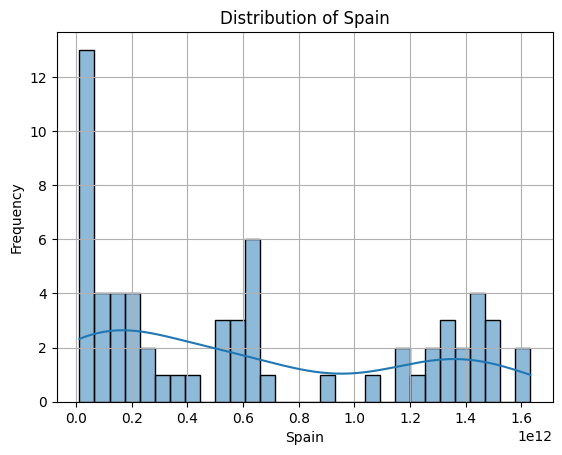

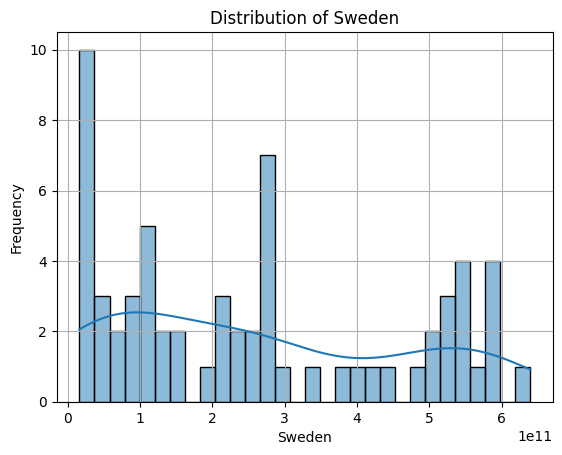

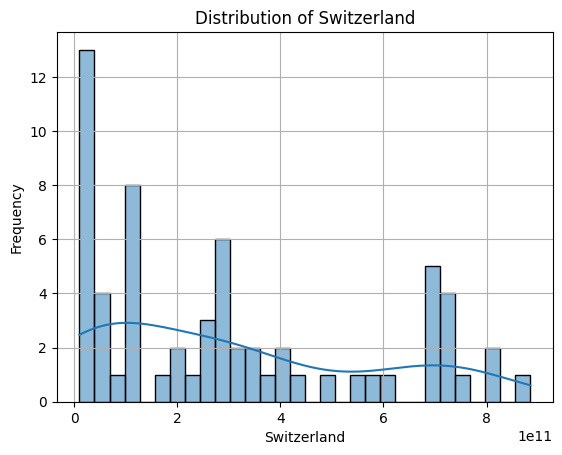

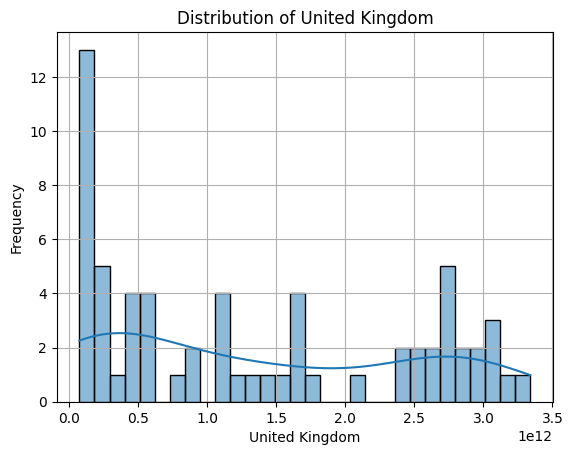

In [16]:
# Plot histograms for each column in the gdp DataFrame
for col in gdp.columns:
    sns.histplot(data=gdp, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [20]:
# transforming the figures into trillions
countries = gdp.columns
gdp[countries] = gdp[countries]/1e12
gdp.head()

,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
Year,,,,,,,,,,,,,,,,,,
1960,0.006650,0.011811,0.006361,0.005279,0.062225,0.084311,0.004335,0.000252,0.001999,0.041916,0.000710,0.013263,0.005197,0.003339,0.012433,0.015953,0.010412,0.073234
1961,0.007375,0.012562,0.007058,0.005984,0.067462,0.096206,0.004961,0.000258,0.002152,0.046542,0.000710,0.014578,0.005670,0.003574,0.014248,0.017355,0.011713,0.077742
1962,0.007824,0.013437,0.007953,0.006407,0.075608,0.105509,0.005213,0.000289,0.002329,0.052293,0.000748,0.015824,0.006107,0.003836,0.016622,0.018821,0.012990,0.081248
1963,0.008447,0.014446,0.008466,0.006958,0.084759,0.111823,0.005895,0.000345,0.002505,0.059898,0.000798,0.017168,0.006553,0.004084,0.019646,0.020372,0.014284,0.086562
1964,0.009250,0.016168,0.009677,0.007848,0.094008,0.122880,0.006670,0.000441,0.002851,0.065570,0.000911,0.020202,0.007207,0.004429,0.021983,0.022718,0.015833,0.094408


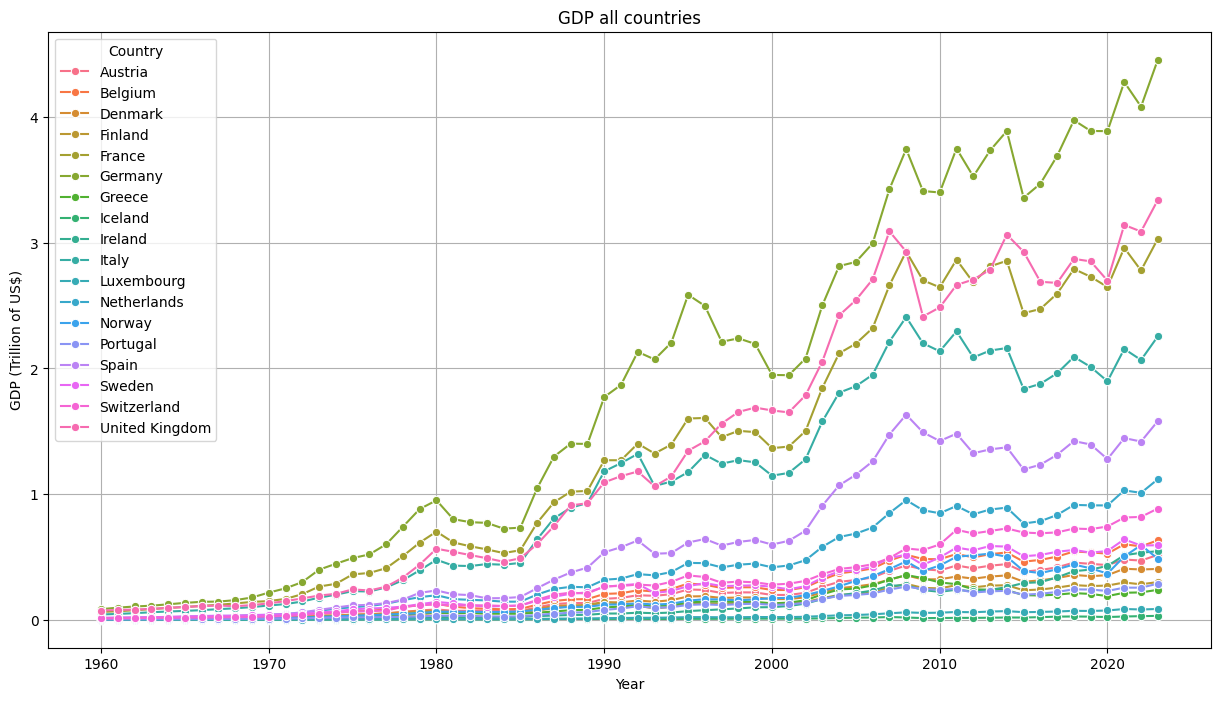

In [21]:
# reshaping the data from long to wide
gdp_melted = gdp.reset_index().melt(id_vars='Year', var_name='Country', value_name='GDP (Trillion of US$)')

# plot the new reshaped data
fig, ax = plt.subplots(1,1,figsize= (15,8))
sns.lineplot(data=gdp_melted, x='Year', y='GDP (Trillion of US$)', hue='Country', marker='o')
plt.title('GDP all countries')
plt.grid()

In [40]:
gdp_melted.head(100)

,Year,Country,GDP (Trillion of US$)
0,1960,Austria,0.006650
1,1961,Austria,0.007375
2,1962,Austria,0.007824
3,1963,Austria,0.008447
4,1964,Austria,0.009250
...,...,...,...
95,1991,Belgium,0.210511
96,1992,Belgium,0.234782
97,1993,Belgium,0.224722
98,1994,Belgium,0.244884


In [24]:
# finding the top ten in the beginning and end years of the dataset
top10_in_2023 = gdp_melted.loc[gdp_melted['Year'] == 2023].sort_values('GDP (Trillion of US$)', ascending = False).head(10)
top10_in_1960 = gdp_melted.loc[gdp_melted['Year'] == 1960].sort_values('GDP (Trillion of US$)', ascending = False).head(10)

In [36]:
top10_in_2023

,Year,Country,GDP (Trillion of US$)
383,2023,Germany,4.456080
1151,2023,United Kingdom,3.340030
319,2023,France,3.030900
639,2023,Italy,2.254850
959,2023,Spain,1.580690
767,2023,Netherlands,1.118120
1087,2023,Switzerland,0.884940
127,2023,Belgium,0.632217
1023,2023,Sweden,0.593268
575,2023,Ireland,0.545629


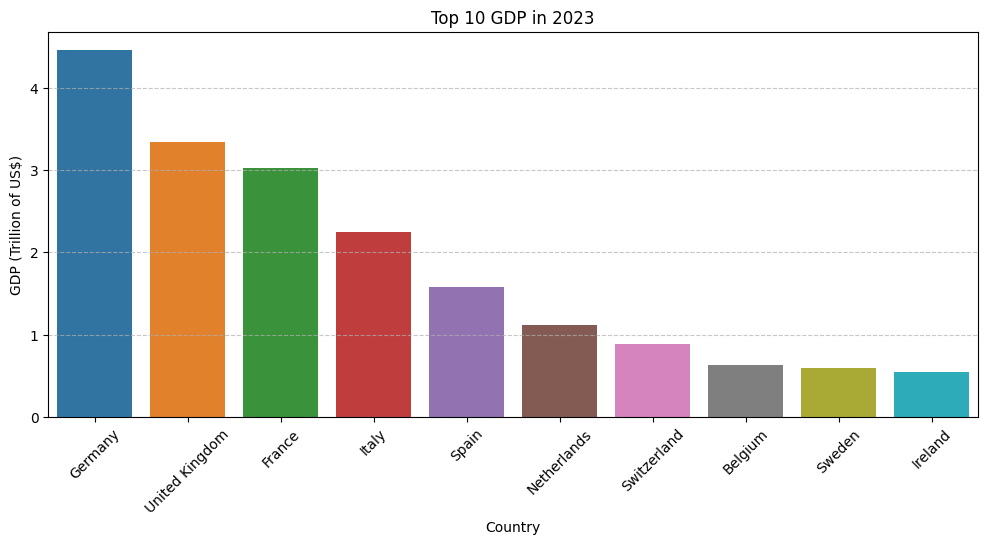

In [37]:
# bar chart of the top 10 gdp in 2023
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.title('Top 10 GDP in 2023')

# Use a custom color palette for different bar colors
sns.barplot(
    data=top10_in_2023, 
    x='Country', 
    y='GDP (Trillion of US$)', 
    palette='tab10'  # You can replace 'viridis' with other palettes like 'coolwarm', 'tab10', etc.
)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for context
plt.show()


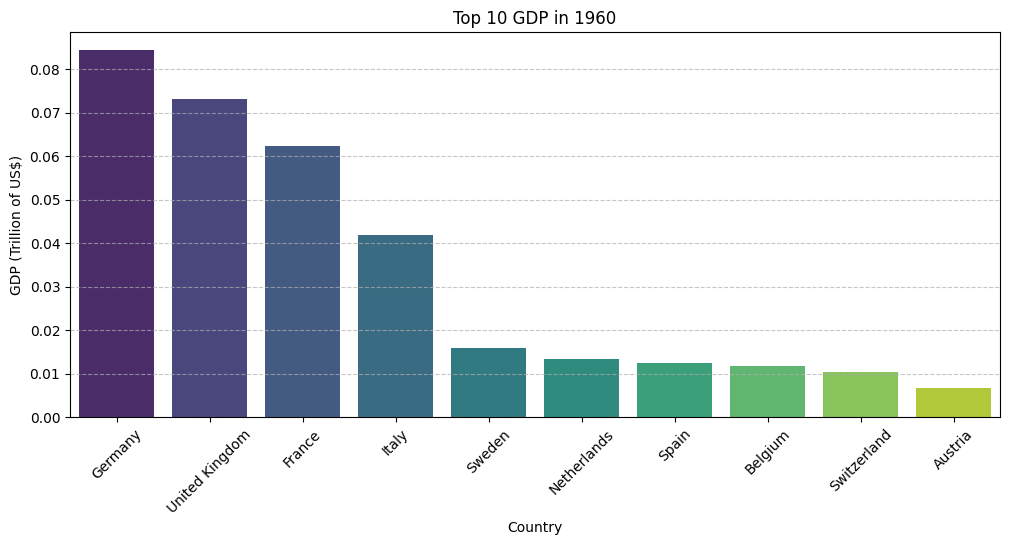

In [30]:
# bar chart of the top 10 gdp in 1960
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.title('Top 10 GDP in 1960')

# Use a custom color palette for different bar colors
sns.barplot(
    data=top10_in_1960, 
    x='Country', 
    y='GDP (Trillion of US$)', 
    palette='viridis'  # You can replace 'viridis' with other palettes like 'coolwarm', 'tab10', etc.
)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for context
plt.show()


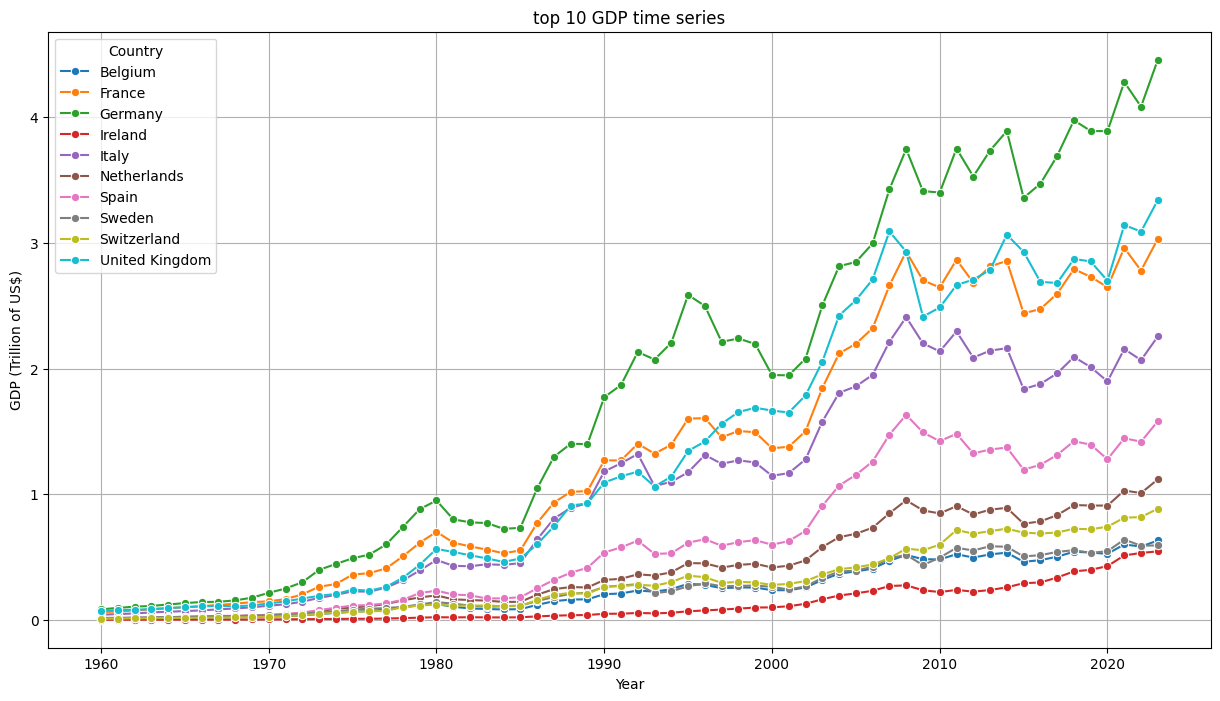

In [31]:
# time series for the top ten gdp
top10 = top10_in_2023.Country.unique()
gdp_top10 = gdp_melted.loc[gdp_melted.Country.isin(top10)]
fig, ax = plt.subplots(1,1,figsize= (15,8))
sns.lineplot(data=gdp_top10, x='Year', y='GDP (Trillion of US$)', hue='Country', marker='o')
plt.title('top 10 GDP time series')
plt.grid()

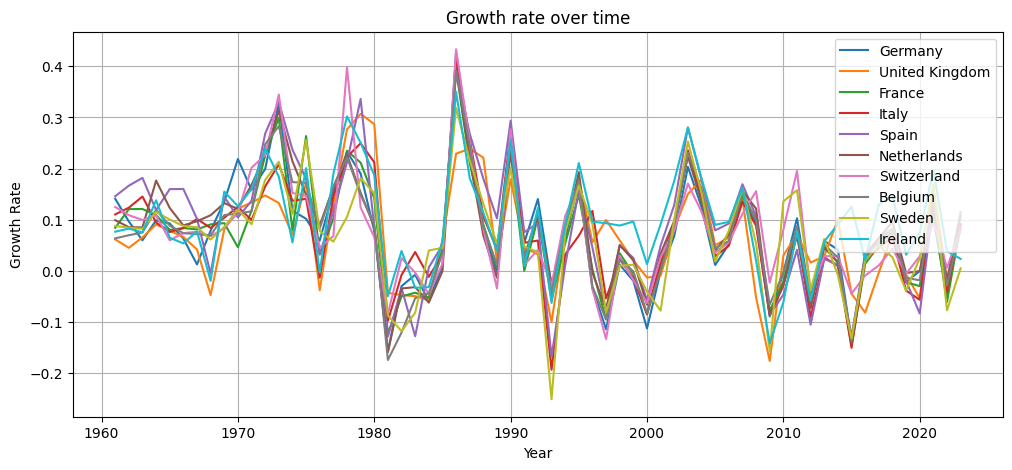

In [41]:
# growth rate over time for the top ten gdp
gdp[top10].apply(lambda x: x.diff() / x.shift(1)).plot.line(figsize = (12,5))
plt.title('Growth rate over time')
plt.ylabel('Growth Rate')
plt.grid()

In [35]:
gdp.head()

,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
Year,,,,,,,,,,,,,,,,,,
1960,0.006650,0.011811,0.006361,0.005279,0.062225,0.084311,0.004335,0.000252,0.001999,0.041916,0.000710,0.013263,0.005197,0.003339,0.012433,0.015953,0.010412,0.073234
1961,0.007375,0.012562,0.007058,0.005984,0.067462,0.096206,0.004961,0.000258,0.002152,0.046542,0.000710,0.014578,0.005670,0.003574,0.014248,0.017355,0.011713,0.077742
1962,0.007824,0.013437,0.007953,0.006407,0.075608,0.105509,0.005213,0.000289,0.002329,0.052293,0.000748,0.015824,0.006107,0.003836,0.016622,0.018821,0.012990,0.081248
1963,0.008447,0.014446,0.008466,0.006958,0.084759,0.111823,0.005895,0.000345,0.002505,0.059898,0.000798,0.017168,0.006553,0.004084,0.019646,0.020372,0.014284,0.086562
1964,0.009250,0.016168,0.009677,0.007848,0.094008,0.122880,0.006670,0.000441,0.002851,0.065570,0.000911,0.020202,0.007207,0.004429,0.021983,0.022718,0.015833,0.094408
